In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv(r'../data/direct_transitivity_data.csv')
df.head()

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,...,config,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
0,0,north/g.10.72.graphml,10,12,0,8,7,15,20,0,...,d_235689,0,1,1,0,1,1,0,1,1
1,1,north/g.13.45.graphml,13,13,0,6,2,8,8,0,...,d_235689,0,1,1,0,1,1,0,1,1
2,2,north/g.10.11.graphml,10,10,0,15,0,15,40,0,...,d_235689,0,1,1,0,1,1,0,1,1
3,3,Rome-Lib/graficon11nodi/grafo233.11,11,18,0,15,12,27,36,0,...,d_235689,0,1,1,0,1,1,0,1,1
4,4,Rome-Lib/graficon12nodi/grafo2240.12,12,16,0,12,11,23,30,0,...,d_235689,0,1,1,0,1,1,0,1,1


In [4]:
df['Status'].value_counts()

2    437453
9    151347
Name: Status, dtype: int64

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,...,config,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
196419,919,Rome-Lib/graficon75nodi/grafo9545.75,75,199,0,2768,3036,5804,22064,20,...,d_459,0,0,0,1,1,0,0,0,1
292634,534,Rome-Lib/graficon67nodi/grafo5147.67,67,114,1,1684,2258,3942,15682,38,...,d_45789,0,0,0,1,1,0,1,1,1
292835,735,Rome-Lib/graficon80nodi/grafo5558.80,80,156,0,3156,4106,7262,34583,232,...,d_45789,0,0,0,1,1,0,1,1,1
497510,710,Rome-Lib/graficon78nodi/grafo4948.78,78,154,0,1126,1443,2569,14452,38,...,d_3568,0,0,1,0,1,1,0,1,0


In [5]:
df.columns

Index(['Index', 'File', 'Nodes', 'Total Nodes', 'Butterflies', 'X-vars',
       'C-vars', 'Total vars', 'Total constraints', 'Crossings', 'Opttime',
       'Status', 'Nodes visited', 'Setup Time', 'config', 'check_1', 'check_2',
       'check_3', 'check_4', 'check_5', 'check_6', 'check_7', 'check_8',
       'check_9'],
      dtype='object')

In [9]:
temp_df = df[df['Opttime']>60][['Total Nodes', 'Crossings','Opttime','Status', 'check_1', 'check_2',
       'check_3', 'check_4', 'check_5', 'check_6', 'check_7', 'check_8',
       'check_9']]

temp_df.head()

,Total Nodes,Crossings,Opttime,Status,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
267,64,940,60.404265,9,0,1,1,0,1,1,0,1,1
368,84,21,60.117755,9,0,1,1,0,1,1,0,1,1
374,83,21,60.181258,9,0,1,1,0,1,1,0,1,1
379,86,21,60.220476,9,0,1,1,0,1,1,0,1,1
382,80,55,60.306249,9,0,1,1,0,1,1,0,1,1


In [28]:
temp_df[(temp_df['Status'] == 9) &  (temp_df['Opttime'] > 70)]

,Total Nodes,Crossings,Opttime,Status,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
196419,199,20,70.345193,9,0,0,0,1,1,0,0,0,1
292634,114,38,171.369854,9,0,0,0,1,1,0,1,1,1
292835,156,232,108.306035,9,0,0,0,1,1,0,1,1,1
497510,154,38,72.264470,9,0,0,1,0,1,1,0,1,0


### Distribution of Opttime of opttime

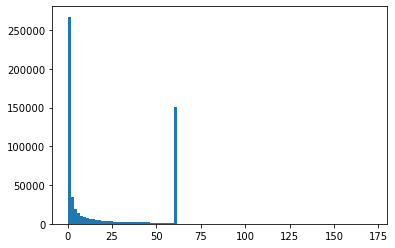

In [7]:
plt.hist(df['Opttime'], bins = 100)
plt.show()

### Distribution of Opttime for status = 9 

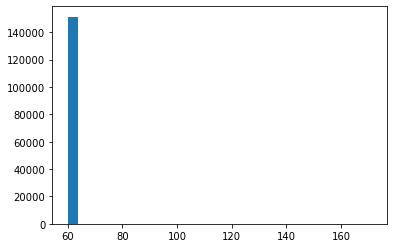

In [23]:
opttime_status_9 = df[df['Status']==9]['Opttime'].to_numpy()


plt.hist(opttime_status_9, bins = 30)
plt.show()

### Distribution of Opttime of opttime less than 60 / status =2 

In [17]:
opttime_status_2 = df[df['Status']==2]['Opttime'].to_numpy()




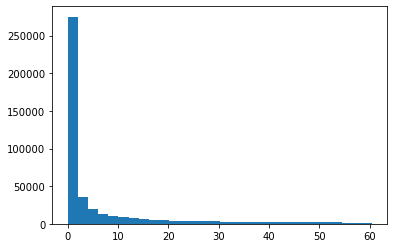

In [22]:
plt.hist(opttime_status_2, bins = 30)
plt.show()

### Distribution of Opttime in Ranges

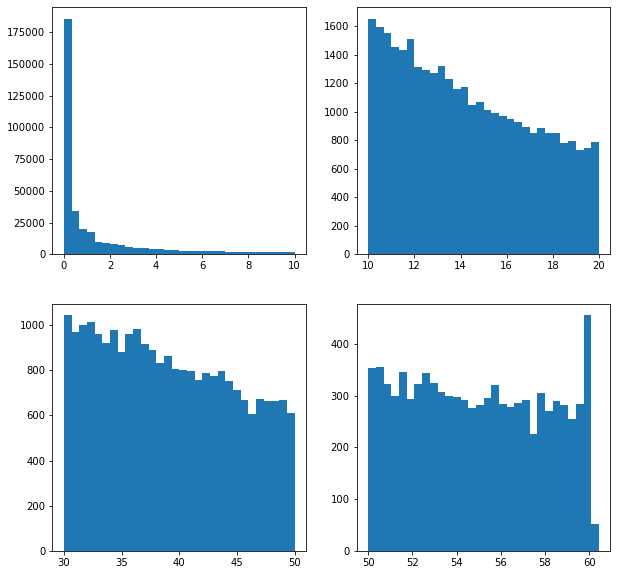

In [21]:
opttime_between_less_10 = df[(df['Opttime']<10)]['Opttime'].to_numpy()
opttime_between_10_30 = df[(df['Opttime']>10)&(df['Opttime']<20)]['Opttime'].to_numpy()
optime_between_30_50 = df[(df['Opttime']>30)&(df['Opttime']<50)]['Opttime'].to_numpy()
optime_between_50_60 = df[(df['Opttime']>50)&(df['Status']==2)]['Opttime'].to_numpy()

bins = 30
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(opttime_between_less_10, bins = bins)
ax[0,1].hist(opttime_between_10_30, bins = bins)
ax[1,0].hist(optime_between_30_50, bins = bins)
ax[1,1].hist(optime_between_50_60, bins = bins)

plt.show()

### Attempt to transform and plot opttime

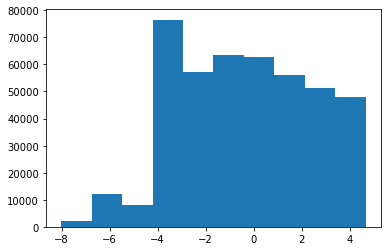

In [11]:
fitted_data, fitted_lambda = stats.boxcox(opttime_status_2)
plt.hist(fitted_data)
plt.show()

### Distribution of transformed Opttime in Ranges

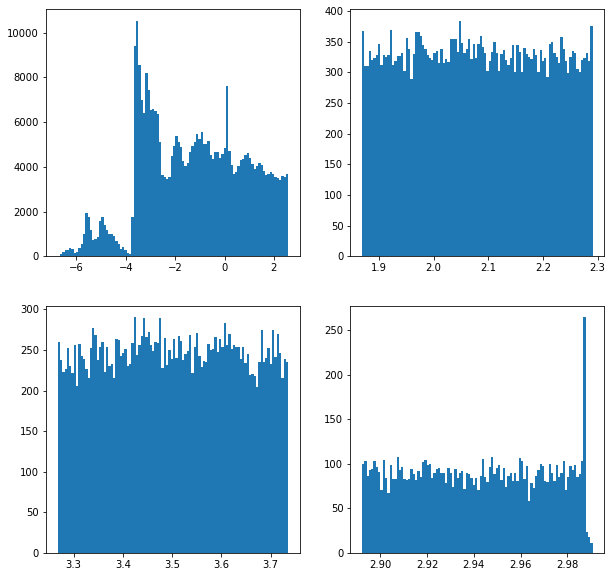

In [12]:
fitted_data_1, fitted_lambda_1 = stats.boxcox(opttime_between_less_10)
fitted_data_2, fitted_lambda_2 = stats.boxcox(opttime_between_10_30)
fitted_data_3, fitted_lambda_3 = stats.boxcox(optime_between_30_50)
fitted_data_4, fitted_lambda_4 = stats.boxcox(optime_between_50_60)

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(fitted_data_1, bins = 100)
ax[0,1].hist(fitted_data_2, bins = 100)
ax[1,0].hist(fitted_data_3, bins = 100)
ax[1,1].hist(fitted_data_4, bins = 100)

plt.show()

Adding graph_id 

In [29]:
graph_df = pd.read_csv(r'../data/graph_properties.csv')

In [33]:
graph_df['graph_id'] = graph_df.index + 1
graph_df.head()

,Index,File,Nodes,NumLayers,NumEdges,EdgeDensity,AvgNodesPerLayer,AvgEdgesPerLayer,graph_id
0,0,north/g.10.72.graphml,12,6,13,0.520000,2.000000,2.600000,1
1,1,north/g.13.45.graphml,13,4,12,0.342857,3.250000,4.000000,2
2,2,north/g.10.11.graphml,10,5,14,1.000000,2.000000,3.500000,3
3,3,Rome-Lib/graficon11nodi/grafo233.11,18,8,19,0.475000,2.250000,2.714286,4
4,4,Rome-Lib/graficon12nodi/grafo2240.12,16,7,17,0.485714,2.285714,2.833333,5


In [34]:
graph_df.shape

(1150, 9)

In [39]:
df.head()

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,...,config,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
0,0,north/g.10.72.graphml,10,12,0,8,7,15,20,0,...,d_235689,0,1,1,0,1,1,0,1,1
1,1,north/g.13.45.graphml,13,13,0,6,2,8,8,0,...,d_235689,0,1,1,0,1,1,0,1,1
2,2,north/g.10.11.graphml,10,10,0,15,0,15,40,0,...,d_235689,0,1,1,0,1,1,0,1,1
3,3,Rome-Lib/graficon11nodi/grafo233.11,11,18,0,15,12,27,36,0,...,d_235689,0,1,1,0,1,1,0,1,1
4,4,Rome-Lib/graficon12nodi/grafo2240.12,12,16,0,12,11,23,30,0,...,d_235689,0,1,1,0,1,1,0,1,1


In [46]:
joined_df = df.merge(graph_df, on = 'File')
joined_df = joined_df[['graph_id','Total Nodes', 'Crossings','Opttime','Status', 'check_1', 'check_2',
       'check_3', 'check_4', 'check_5', 'check_6', 'check_7', 'check_8',
       'check_9' ]]

In [47]:
joined_df.head()


,graph_id,Total Nodes,Crossings,Opttime,Status,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
0,1,12,0,0.000556,2,0,1,1,0,1,1,0,1,1
1,1,12,0,0.000984,2,1,0,0,0,1,0,0,1,0
2,1,12,0,0.000857,2,1,0,0,0,1,1,1,0,0
3,1,12,0,0.000621,2,0,1,1,1,1,1,0,1,0
4,1,12,0,0.000661,2,0,0,0,0,1,0,0,1,0


In [49]:
joined_df[].groupby(['graph_id'])['Opttime'].mean()

graph_id
1        0.002922
2        0.000548
3        0.000053
4        0.005507
5        0.147989
          ...    
1146    60.110456
1147    60.085090
1148    60.031670
1149    42.766048
1150    42.394350
Name: Opttime, Length: 1150, dtype: float64

In [54]:
df_no_checks = pd.read_csv(r'../data/direct_transitivity/d_.csv')

In [55]:
df_no_checks

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time
0,0,north/g.10.72.graphml,10,12,0,8,7,15,18,0,0.001962,2,0,0.028
1,1,north/g.13.45.graphml,13,13,0,31,2,33,118,0,0.000073,2,0,0.004
2,2,north/g.10.11.graphml,10,10,0,15,0,15,40,0,0.000067,2,0,0.002
3,3,Rome-Lib/graficon11nodi/grafo233.11,11,18,0,15,12,27,36,0,0.000055,2,0,0.002
4,4,Rome-Lib/graficon12nodi/grafo2240.12,12,16,0,12,11,23,28,0,0.011561,2,1,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1145,Rome-Lib/graficon83nodi/grafo7818.83,83,232,0,2515,3173,5688,44232,427,60.059385,9,1,2.431
1146,1146,Rome-Lib/graficon92nodi/grafo8646.92,92,231,1,2840,3752,6592,59244,660,60.106764,9,1,3.563
1147,1147,Rome-Lib/graficon91nodi/grafo11599.91,91,230,0,2165,2658,4823,34898,258,60.041819,9,1,1.950
1148,1148,Rome-Lib/graficon100nodi/grafo11613.100,100,231,1,1785,2201,3986,26832,196,60.041623,9,1,1.433
